In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from pandas import DataFrame
COIN = "ADA"
from matplotlib import pyplot
from math import sqrt
from sklearn.metrics import mean_squared_error

In [2]:
df_orig = pd.read_hdf("apr21a.hdf")
df_orig = df_orig.fillna(0)
df_orig

,trade_in_3h_usdtfutures_ADAUSDT_close_price,trade_in_2h_usdtfutures_ADAUSDT_close_price,trade_in_1h_usdtfutures_ADAUSDT_close_price,usdtfutures_ADAUSDT_open_price,usdtfutures_ADAUSDT_high_price,usdtfutures_ADAUSDT_low_price,usdtfutures_ADAUSDT_close_price,usdtfutures_ADAUSDT_volume,usdtfutures_ADAUSDT_quota_asset_volume,usdtfutures_ADAUSDT_number_of_trades,...,usdtfutures_ADAUSDT_taker_buy_quote_asset_volume_mean_1440,usdtfutures_ADAUSDT_taker_buy_quote_asset_volume_skew_1440,usdtfutures_ADAUSDT_taker_buy_quote_asset_volume_kurt_1440,usdtfutures_ADAUSDT_taker_buy_quote_asset_volume_std_1440,usdtfutures_ADAUSDT_taker_buy_quote_asset_volume_cov_1440,usdtfutures_ADAUSDT_taker_buy_quote_asset_volume_mean_10080,usdtfutures_ADAUSDT_taker_buy_quote_asset_volume_skew_10080,usdtfutures_ADAUSDT_taker_buy_quote_asset_volume_kurt_10080,usdtfutures_ADAUSDT_taker_buy_quote_asset_volume_std_10080,usdtfutures_ADAUSDT_taker_buy_quote_asset_volume_cov_10080
2021-03-02 05:00:59.999000+00:00,-0.010815,-0.002944,-0.008980,1.23006,1.23146,1.22583,1.22606,738444.0,907751.42233,961,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00
2021-03-02 05:01:59.999000+00:00,-0.011549,-0.005069,-0.012201,1.22654,1.22758,1.22350,1.22697,425635.0,521454.93918,732,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00
2021-03-02 05:02:59.999000+00:00,-0.009274,0.000008,-0.009715,1.22697,1.22706,1.22430,1.22491,321903.0,394416.72508,424,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00
2021-03-02 05:03:59.999000+00:00,-0.005849,0.006406,-0.005645,1.22520,1.22571,1.22002,1.22065,680874.0,832328.74140,965,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00
2021-03-02 05:04:59.999000+00:00,-0.000910,0.007746,-0.005156,1.22046,1.22108,1.21800,1.22000,527838.0,643753.74882,919,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-01 23:56:59.999000+00:00,0.000000,0.000000,0.000000,1.35413,1.35546,1.35412,1.35448,125023.0,169374.97590,300,...,168667.467944,4.815861,36.912061,174996.324543,3.062371e+10,278053.948436,5.377655,79.108486,296783.339118,8.808035e+10
2021-05-01 23:57:59.999000+00:00,0.000000,0.000000,0.000000,1.35448,1.35542,1.35413,1.35416,83269.0,112801.58182,300,...,167938.350590,4.863338,37.975067,173374.905986,3.005886e+10,278038.817601,5.377279,79.099962,296792.076355,8.808554e+10
2021-05-01 23:58:59.999000+00:00,0.000000,0.000000,0.000000,1.35424,1.35476,1.35352,1.35357,108584.0,147028.88915,287,...,167373.468236,4.907576,38.757953,172434.264448,2.973358e+10,278025.062847,5.376972,79.092786,296799.494325,8.808994e+10
2021-05-01 23:59:59.999000+00:00,0.000000,0.000000,0.000000,1.35357,1.35395,1.35250,1.35357,282776.0,382653.00940,571,...,166568.921590,4.938503,40.079463,169637.738260,2.877696e+10,278014.853586,5.376988,79.091823,296801.034670,8.809085e+10


In [3]:
df_orig["usdtfutures_ADAUSDT_close_price"]

2021-03-02 05:00:59.999000+00:00    1.22606
2021-03-02 05:01:59.999000+00:00    1.22697
2021-03-02 05:02:59.999000+00:00    1.22491
2021-03-02 05:03:59.999000+00:00    1.22065
2021-03-02 05:04:59.999000+00:00    1.22000
                                     ...   
2021-05-01 23:56:59.999000+00:00    1.35448
2021-05-01 23:57:59.999000+00:00    1.35416
2021-05-01 23:58:59.999000+00:00    1.35357
2021-05-01 23:59:59.999000+00:00    1.35357
2021-05-02 00:00:59.999000+00:00    1.35518
Name: usdtfutures_ADAUSDT_close_price, Length: 87541, dtype: float64

In [4]:
PRICE_COLUMN = "usdtfutures_{}USDT_close_price".format(COIN)
#df = df_orig.iloc[-(8640+(60*48)):-8640]
df = df_orig
input_seq = df[PRICE_COLUMN].values


d = {'ds': df.index, 'y': input_seq}

df2 = pd.DataFrame(data=d)
df2['ds'] = pd.to_datetime(df2['ds']).dt.tz_localize(None)
df2 = df2[:1000]
df2

,ds,y
0,2021-03-02 05:00:59.999,1.22606
1,2021-03-02 05:01:59.999,1.22697
2,2021-03-02 05:02:59.999,1.22491
3,2021-03-02 05:03:59.999,1.22065
4,2021-03-02 05:04:59.999,1.22000
...,...,...
995,2021-03-02 21:35:59.999,1.19170
996,2021-03-02 21:36:59.999,1.18946
997,2021-03-02 21:37:59.999,1.18852
998,2021-03-02 21:38:59.999,1.18922


In [5]:

model = ARIMA(df2['y'].astype(float), order=(4,1,8))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(4, 1, 8)   Log Likelihood                4638.586
Date:                Tue, 11 May 2021   AIC                          -9251.172
Time:                        01:40:29   BIC                          -9187.384
Sample:                             0   HQIC                         -9226.927
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1205      1.485      0.081      0.935      -2.789       3.030
ar.L2         -0.4391      0.727     -0.604      0.546      -1.865       0.986
ar.L3          0.2828      0.698      0.405      0.6

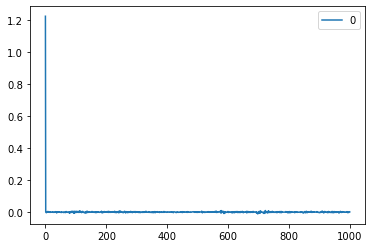

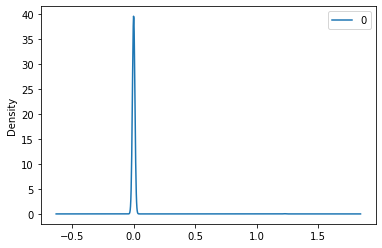

                 0
count  1000.000000
mean      0.001182
std       0.038843
min      -0.011415
25%      -0.001337
50%      -0.000118
75%       0.001254
max       1.226060


In [6]:
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

In [7]:

X = df2['y'].values
X = X[:30]
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]

test[0]

import pmdarima as pm
history = [x for x in train]
predictions = list()
# walk-forward validation
forecast_minutes = 60
for t in range(len(test)):
    model = ARIMA(history, order=(4,1,1))
    model_fit = model.fit()
    output = model_fit.forecast(steps=forecast_minutes)
    yhat = output[-1]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes


predicted=1.223618, expected=1.224170
predicted=1.224111, expected=1.224080
predicted=1.224338, expected=1.222770


/home/vaclavmatejka/anaconda3/envs/pybinbacktester/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/vaclavmatejka/anaconda3/envs/pybinbacktester/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1.222481, expected=1.222080
predicted=1.221991, expected=1.222260
predicted=1.222447, expected=1.220710


/home/vaclavmatejka/anaconda3/envs/pybinbacktester/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1.220604, expected=1.222630
predicted=1.223275, expected=1.222590
predicted=1.222083, expected=1.221330
predicted=1.221737, expected=1.219310
predicted=1.218978, expected=1.219410
Test RMSE: 0.001


/home/vaclavmatejka/anaconda3/envs/pybinbacktester/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


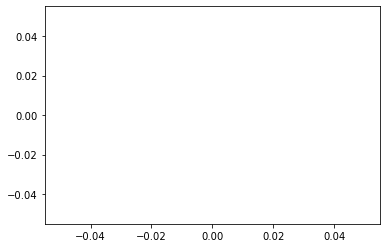

In [8]:
pyplot.plot(test[forecast_minutes:])
pyplot.plot(predictions[:-forecast_minutes], color='red')
pyplot.show()

In [9]:
from pmdarima.arima import ndiffs
X = df_orig['usdtfutures_{}USDT_close_price'.format(COIN)].values
X = X[:int(len(X))]



In [10]:





coin_banks = {}
["ETH", "ADA", "XRP", "BTC", "BNB"]
for coin in ["ADA"]:
    model_history_size = 60
    forecast_minutes = 60
    real_predicted_initial = [] # list of tuples
    aics = []
    orders = []
    preselected_order =None
    ii=0
    X = df_orig['usdtfutures_{}USDT_close_price'.format(coin)].values
    

    o1,o2,o3 = 0,0,0
    for t in range(model_history_size,len(X)-forecast_minutes,forecast_minutes):
        ii+=1
        x = X[t-model_history_size:t]
        kpss_diffs = ndiffs(x, alpha=0.05, test='kpss', max_d=12)
        adf_diffs = ndiffs(x, alpha=0.05, test='adf', max_d=12)
        n_diffs = max(adf_diffs, kpss_diffs)

        initial = X[t]
        real = X[t+forecast_minutes]
        
        preselected_order=None
        if preselected_order:
            model = ARIMA(x, order=preselected_order)
            model_fit = model.fit()
            aics.append(model_fit.aic)
            output = model_fit.forecast(steps=forecast_minutes)
        else:
            #information_criterion, one of (‘aic’, ‘aicc’, ‘bic’, ‘hqic’, ‘oob’)
            """
            model = pm.auto_arima(x, d=n_diffs, seasonal=False, stepwise=True,
                             suppress_warnings=True, error_action="ignore", max_p=12,
                             max_order=None, trace=True, information_criterion="oob", out_of_sample_size=5,
                            alpha=0.05,scoring=["mse", "mae"][0])

            """
            """
            ‘newton’ for Newton-Raphson
            ‘nm’ for Nelder-Mead
            ‘bfgs’ for Broyden-Fletcher-Goldfarb-Shanno (BFGS)
            ‘lbfgs’ for limited-memory BFGS with optional box constraints
            ‘powell’ for modified Powell’s method
            ‘cg’ for conjugate gradient
            ‘ncg’ for Newton-conjugate gradient
            ‘basinhopping’ for global basin-hopping solver

            """
            model = pm.auto_arima(x,max_p=5, max_d=5, max_q=5, start_q=2,method="lbfgs",trace=True, alpha=0.07)

            output = model.predict(steps=forecast_minutes)
            aics.append(model.aic())
            order = model.get_params()['order']
            orders.append(order)
            o1 = o1 + order[0]
            o2 = o2 + order[1]
            o3 = o3 + order[2]
            
            if len(orders) > 100:
                preselected_order = (int(o1/len(orders)),int(o2/len(orders)),int(o3/len(orders)))




        predicted = output[-1]
        real_predicted_initial.append([real, predicted, initial])
    
    initial_bank = 400000
    rake = 0.00018
    last_side = 1
    for real, predicted, initial in real_predicted_initial:
        profit = -1
        if predicted > initial and real > initial:
            profit = 1
        if predicted < initial and real < initial:
            profit = 1

        if predicted > initial:
            side = 1
        else:
            side = -1

        change = abs((real/initial) -1)

        initial_bank = initial_bank + (initial_bank * change * profit)

        if side != last_side:
            rake_change = initial_bank * rake
            rake_change = rake_change * 2
            initial_bank = initial_bank - rake_change

        last_side = side


    coin_banks[coin] = (initial_bank, len(real_predicted_initial))
coin_banks

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-572.569, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-580.570, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-579.052, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-579.023, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-581.990, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-576.968, Time=0.08 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.346 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-507.027, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-511.164, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-509.489, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-509.508, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-513.104, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-507.565, Time=0.16 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]         

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-524.906, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.04 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.532 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-576.364, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-577.579, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-576.985, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-578.193, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-579.266, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.436 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-544.146, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-545.631, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-546.869, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-5

 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-599.375, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-599.275, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-592.516, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.676 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-536.357, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-595.321, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-594.392, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-594.121, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-596.592, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-592.152, Time=0.08 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.364 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-604.633, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : A

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-603.472, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-611.620, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-609.973, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-610.070, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-613.076, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-607.620, Time=0.19 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.691 seconds
Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=-611.370, Time=0.10 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-569.659, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-594.947, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=-606.898, Time=0.08 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=-607.131, Time=0.07 sec
 ARIMA(3,2,2)(0,0,0)[0]             : AIC=-608.959, Time=0.10 sec
 ARIMA(2,2,3)(0,0,0)[0]    

 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.09 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.844 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-556.362, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-565.548, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-563.859, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-563.919, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-567.196, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-561.547, Time=0.12 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.690 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-517.124, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-460.376, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-522.685, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-503.105, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : A

 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-519.501, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-517.201, Time=0.43 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.03 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.957 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-566.108, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-574.054, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-572.099, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-572.107, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-575.160, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-570.102, Time=0.17 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.675 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-553.814, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-559.762, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : A

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-541.321, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-535.943, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-545.026, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-543.461, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-537.225, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-543.448, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-543.245, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-541.138, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-545.470, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-543.691, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-543.562, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-543.631, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-541.487, Time=0.08 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 0.851 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-616.070, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-619.257, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-621.569, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-622.350, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-617.532, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-620.007, Time=0.12 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-620.406, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-618.397, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-617.508, Time=0.06 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 0.891 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-606.861, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-614.864, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-612.988, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-613.000, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-582.151, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-583.852, Time=0.04 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-582.210, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.10 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.583 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-551.518, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-559.056, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-557.489, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-557.463, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-558.670, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-555.500, Time=0.04 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.432 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-621.003, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : A

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-582.519, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-640.774, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-643.344, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-642.815, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-640.962, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-641.402, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-641.356, Time=0.11 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-634.773, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-642.345, Time=0.04 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 0.738 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-624.980, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-632.980, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-633.073, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-632.540, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0

 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-646.670, Time=0.14 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-649.738, Time=0.13 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-646.194, Time=0.17 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-647.818, Time=0.06 sec

Best model:  ARIMA(2,1,1)(0,0,0)[0] intercept
Total fit time: 1.105 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-644.355, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-649.623, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-651.624, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-651.299, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-650.846, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-650.057, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-649.290, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-643.620, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-652.345, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0

 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-616.466, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-621.078, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-615.744, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-619.950, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-619.856, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-617.849, Time=0.05 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.704 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-632.589, Time=0.22 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-569.306, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-651.745, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-604.517, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=185.880, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-649.729, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-649.651, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]

 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-631.175, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-641.573, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-639.591, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-639.579, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-640.561, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-632.404, Time=0.07 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 0.767 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-653.962, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-650.903, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-651.964, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-653.805, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-652.393, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-652.709, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-656.619, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-621.720, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-625.697, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-623.885, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-623.939, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-625.486, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-621.694, Time=0.06 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.480 seconds
Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=-498.000, Time=0.25 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-460.048, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-480.981, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-499.851, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-497.334, Time=0.06 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=-500.055, Time=0.05 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=-497.721, Time=0.06 sec
 ARIMA(0,2,3)(0,0,0)[0

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-564.765, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-571.302, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-570.223, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-570.120, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-568.949, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-567.302, Time=0.07 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.338 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-571.041, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-574.739, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-576.440, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-575.748, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-576.739, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-574.795, Time=0.06 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.337 seconds
Performing 

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-612.433, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-620.439, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-618.448, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-618.427, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-622.323, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-616.436, Time=0.11 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.640 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-641.196, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-559.243, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-645.219, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-611.960, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=191.360, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-643.519, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-643

 ARIMA(2,2,2)(0,0,0)[0]             : AIC=-624.096, Time=0.18 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-592.149, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-613.378, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-628.930, Time=0.04 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-622.755, Time=0.05 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=-626.666, Time=0.04 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=-625.903, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-627.275, Time=0.12 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0]          
Total fit time: 0.615 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-631.394, Time=0.94 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-561.050, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-640.884, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-607.072, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=187.038, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0]

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-647.113, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-655.114, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-654.775, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-654.296, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-656.991, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-654.343, Time=0.09 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.540 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-630.594, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-564.708, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-642.452, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-602.752, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=186.126, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-638.014, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-638.695, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0]

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-651.358, Time=0.29 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.08 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 1.452 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-638.668, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-646.670, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-645.737, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-645.891, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-647.399, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-643.819, Time=0.08 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.358 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-516.910, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-470.200, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-522.623, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : A

 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-559.158, Time=0.27 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-483.371, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-564.579, Time=0.20 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-526.191, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=176.766, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-560.996, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-562.526, Time=0.19 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-558.624, Time=0.32 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 1.151 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-563.597, Time=0.47 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-497.532, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-577.669, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-534.627, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]     

 ARIMA(1,2,3)(0,0,0)[0]             : AIC=-521.160, Time=0.13 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=-526.805, Time=0.19 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=-524.646, Time=0.04 sec
 ARIMA(2,2,3)(0,0,0)[0]             : AIC=-527.552, Time=0.24 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-530.528, Time=0.07 sec

Best model:  ARIMA(1,2,2)(0,0,0)[0]          
Total fit time: 1.287 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-491.364, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-489.401, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-489.373, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-493.121, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-487.546, Time=0.09 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.554 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : A

 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-610.700, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-613.125, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-608.803, Time=0.09 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.598 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-608.897, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-616.695, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-615.245, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-615.153, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-618.590, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-613.517, Time=0.04 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.434 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-611.025, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-615.020, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept 

 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-572.472, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-579.191, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-533.021, Time=0.19 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-576.939, Time=0.06 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-574.966, Time=0.15 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-574.982, Time=0.02 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0] intercept
Total fit time: 1.052 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-575.599, Time=0.51 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-503.926, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-580.995, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-543.975, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=181.028, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-578.942, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-578.858, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0]

 ARIMA(2,2,1)(0,0,0)[0]             : AIC=-584.632, Time=0.03 sec
 ARIMA(3,2,2)(0,0,0)[0]             : AIC=-557.954, Time=0.15 sec
 ARIMA(2,2,3)(0,0,0)[0]             : AIC=-583.987, Time=0.15 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-584.688, Time=0.03 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=-584.806, Time=0.07 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=-584.361, Time=0.08 sec
 ARIMA(3,2,3)(0,0,0)[0]             : AIC=-562.140, Time=0.12 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-589.491, Time=0.14 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-580.035, Time=0.17 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=-583.235, Time=0.04 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=-588.412, Time=0.28 sec
 ARIMA(2,2,3)(0,0,0)[0] intercept   : AIC=-589.055, Time=0.08 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-584.093, Time=0.09 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=-585.029, Time=0.06 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=-583.125, Time=0.08 sec
 ARIMA(3,2

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-564.357, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-570.312, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-570.091, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-570.298, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-572.289, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-568.397, Time=0.12 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.621 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-539.996, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-545.978, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-544.098, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-544.065, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-545.570, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-542.319, Time=0.05 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.311 seconds
Performing 

 ARIMA(2,2,2)(0,0,0)[0]             : AIC=-585.989, Time=0.14 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-553.477, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-572.486, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-590.056, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-590.105, Time=0.06 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=-588.615, Time=0.08 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=-588.282, Time=0.06 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=-590.389, Time=0.04 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=-587.480, Time=0.04 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=-585.864, Time=0.09 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=-588.601, Time=0.07 sec

Best model:  ARIMA(0,2,2)(0,0,0)[0]          
Total fit time: 0.642 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-533.800, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-541.178, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0

 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-624.637, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-588.695, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=177.651, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-622.881, Time=0.10 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-622.910, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-619.761, Time=0.42 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.05 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.943 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-609.827, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-617.829, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-616.244, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-616.255, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-618.398, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-614.238, Time=0.04 sec

Best model:  ARIMA(0,1,0)(0

 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-531.378, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-533.310, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-529.350, Time=0.05 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.425 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-494.379, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-498.708, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-497.742, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-497.498, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-499.640, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-495.576, Time=0.05 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.505 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-515.051, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-523.051, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept 

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-597.111, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-605.409, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-603.411, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-603.395, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-606.802, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-601.407, Time=0.04 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.310 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-600.781, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-524.832, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-606.494, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-563.977, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=197.977, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-604.449, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-603.488, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0]

 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-547.785, Time=0.46 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-547.343, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-546.401, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.06 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 1.162 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-506.398, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-511.769, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-509.890, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-509.953, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-512.394, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-507.917, Time=0.08 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.396 seconds
Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=-502.229, Time=0.19 sec
 ARIMA(0,2,0)(0,0,0)[0]             : A

 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-459.039, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-459.056, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-462.882, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-457.280, Time=0.15 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.439 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-449.747, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-457.341, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-455.343, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-455.343, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-459.239, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-453.341, Time=0.07 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.388 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-482.971, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept 

 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-598.987, Time=0.08 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.482 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-534.866, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-538.071, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-536.481, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-536.429, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-538.974, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-534.256, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.310 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-571.771, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-573.905, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-575.921, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-575.164, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]           

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-544.775, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-548.038, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-546.377, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-546.583, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-549.490, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-544.038, Time=0.08 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.488 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-545.829, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-547.224, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-545.261, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-545.268, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-549.179, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-505.009, Time=0.11 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.369 seconds
Performing 

 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-638.169, Time=0.10 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 1.207 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-626.687, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-633.631, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-631.645, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-631.645, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-635.610, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-629.630, Time=0.10 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.646 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-648.907, Time=0.38 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-614.303, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-653.680, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-637.125, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]           

 ARIMA(3,1,0)(0,0,0)[0]             : AIC=-617.361, Time=0.11 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-617.345, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-613.333, Time=0.08 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=-615.366, Time=0.13 sec

Best model:  ARIMA(2,1,0)(0,0,0)[0]          
Total fit time: 1.840 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-597.194, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-602.859, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-602.193, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-602.475, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-604.104, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-601.403, Time=0.05 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.312 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-556.191, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept 

 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-589.243, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-585.023, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-581.500, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-582.793, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-580.209, Time=0.10 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 1.489 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-562.698, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-496.383, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-572.202, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-541.321, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=193.035, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-570.525, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-570.300, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-568.544, Time=0.27 sec
 ARIMA(1,0,0)(0,0,0)[0]

 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-595.285, Time=0.10 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0]          
Total fit time: 1.499 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-551.482, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-585.847, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-584.845, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-585.523, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-585.412, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-581.640, Time=0.05 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.422 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-574.055, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-577.673, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-575.752, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-575.782, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]           

 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-617.212, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-615.000, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.03 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.595 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-649.294, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-612.046, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-657.866, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-636.302, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=192.462, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-655.863, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-655.862, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-646.904, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.465 seconds
Performing stepwise se

 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-567.245, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-561.957, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-566.535, Time=0.05 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 0.616 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-564.513, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-500.323, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-570.123, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-540.585, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=187.944, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-568.275, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-568.314, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-559.252, Time=0.18 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.03 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.611 seconds
Performing stepwi

 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-585.798, Time=0.28 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=-592.364, Time=0.38 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-584.690, Time=0.10 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=-585.811, Time=0.34 sec
 ARIMA(2,1,3)(0,0,0)[0]             : AIC=-589.140, Time=0.12 sec

Best model:  ARIMA(2,1,3)(0,0,0)[0] intercept
Total fit time: 3.314 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-420.357, Time=0.31 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-345.568, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-425.699, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-385.875, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=187.579, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-423.573, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-423.789, Time=0.10 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-422.224, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0]

 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-612.048, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-534.540, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-618.284, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-568.293, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=184.978, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-616.721, Time=0.11 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-616.722, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-614.288, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.04 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.574 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-451.037, Time=0.63 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-531.660, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-608.571, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-570.946, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]     

 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-591.605, Time=0.13 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.578 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-592.196, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-598.101, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-596.559, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-595.816, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-598.513, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-593.758, Time=0.07 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.435 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-622.148, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-583.070, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-628.919, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-612.129, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]           

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-546.858, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-557.157, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-555.454, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-555.491, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-555.675, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-553.156, Time=0.05 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.403 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-565.251, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-572.856, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-571.246, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-571.215, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-572.723, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-569.213, Time=0.09 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.584 seconds
Performing 

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-518.249, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-525.060, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-523.719, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-523.803, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-527.020, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-521.776, Time=0.10 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.538 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-525.100, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-533.100, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-531.106, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-531.103, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-533.570, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-529.086, Time=0.08 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.496 seconds
Performing 

 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-601.794, Time=0.10 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.453 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-620.009, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-624.287, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-624.272, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-624.712, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-626.280, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-622.840, Time=0.09 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.492 seconds
Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=-591.463, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-564.023, Time=0.05 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-576.774, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-598.256, Time=0.10 sec
 ARIMA(1,2,1)(0,0,0)[0]           

 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-567.321, Time=0.10 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0] intercept
Total fit time: 0.885 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-555.196, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-562.387, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-560.741, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-560.810, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-564.386, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-560.261, Time=0.09 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.543 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-546.287, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-551.415, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-552.301, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-552.173, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]           

 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-603.705, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-517.600, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-606.136, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-564.357, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=193.550, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-606.381, Time=0.04 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-605.819, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-601.307, Time=0.25 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-605.549, Time=0.12 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-603.349, Time=0.15 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.10 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.960 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-626.195, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-565.917, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] inte

 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-624.214, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-571.553, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-630.519, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-602.304, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=193.413, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-628.573, Time=0.13 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-628.537, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-626.522, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.15 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 1.142 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-601.438, Time=0.26 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-478.702, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-592.460, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-525.576, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[0]     

 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-558.049, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-558.012, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-561.963, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-556.087, Time=0.12 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.635 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-616.537, Time=0.45 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-617.450, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-623.251, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-622.570, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-617.371, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-621.397, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-621.064, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-575.420, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-620.722, Time=0.05 sec

Best model:  ARIMA(1,

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-627.026, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-629.515, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-630.152, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-630.719, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-631.221, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-629.270, Time=0.07 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.394 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-623.627, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-631.629, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-630.551, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-630.561, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-632.274, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-628.594, Time=0.06 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.329 seconds
Performing 

 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-634.728, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-632.736, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.457 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-573.232, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-581.233, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-580.479, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-580.503, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-583.072, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-578.489, Time=0.05 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.446 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-580.646, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-619.971, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : A

 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-645.193, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=194.374, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-664.089, Time=0.06 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-651.768, Time=0.13 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-662.544, Time=0.06 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-664.178, Time=0.12 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=-658.061, Time=0.10 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-646.178, Time=0.37 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=-661.170, Time=0.20 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=-649.525, Time=0.09 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=-654.365, Time=0.13 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-614.141, Time=0.18 sec

Best model:  ARIMA(1,0,3)(0,0,0)[0] intercept
Total fit time: 1.707 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-531.386, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]

 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-570.698, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-507.702, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=196.935, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-569.533, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-569.426, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-567.395, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.06 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.652 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-640.802, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-566.023, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-640.447, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-596.521, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=197.165, Time=0.00 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-641.181, Time=0.08 sec
 ARIMA(0,0,2)(0,0,0)[0] inter

 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-690.917, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-664.480, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=195.617, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-689.446, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-689.204, Time=0.10 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-687.071, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.08 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.614 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-658.425, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-552.860, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-662.981, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-601.450, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=195.327, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-662.255, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0] inter

 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-584.718, Time=0.09 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.442 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-635.546, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-643.550, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-648.830, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-649.943, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-645.470, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-647.742, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-647.997, Time=0.15 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-637.547, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-651.518, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-649.295, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-649.605, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-650.547, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0

 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-624.304, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-576.262, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.08 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.570 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-607.055, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-607.224, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-607.110, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-609.373, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-608.511, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-554.262, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-611.547, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-609.068, Time=0.11 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-609.504, Time=0.09 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-608.369, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[0]    

/home/vaclavmatejka/anaconda3/envs/pybinbacktester/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/home/vaclavmatejka/anaconda3/envs/pybinbacktester/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-645.742, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-653.744, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-653.054, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-653.675, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-655.186, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-652.638, Time=0.10 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.705 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-694.943, Time=0.29 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-684.877, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-707.901, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-702.854, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=193.550, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-706.503, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-706.336, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0]

 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.10 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.915 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-700.647, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-699.767, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-704.400, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-706.203, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-701.683, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-704.195, Time=0.13 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-704.914, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-702.821, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-707.983, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-705.957, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-706.607, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-706.251, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0]    

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-677.507, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-674.480, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-683.650, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-679.549, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-676.128, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-682.708, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-682.586, Time=0.13 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-680.937, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-684.707, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-684.113, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-683.931, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-680.745, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-682.477, Time=0.15 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 1.318 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0

 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-616.427, Time=0.09 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.459 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-638.403, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-644.444, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-642.616, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-642.419, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-646.432, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-640.524, Time=0.04 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.435 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-631.794, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-639.536, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-637.559, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-637.561, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]           

 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-624.807, Time=0.13 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-622.595, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.07 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.561 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-590.320, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-599.390, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-597.413, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-597.404, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-600.923, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-595.174, Time=0.08 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.463 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-654.047, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-659.521, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : A

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-588.293, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-595.536, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-593.870, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-593.917, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-595.185, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-592.133, Time=0.05 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.556 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-583.809, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-498.818, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-584.977, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-541.156, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=195.512, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-584.473, Time=0.09 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-583.505, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0]

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-669.862, Time=0.23 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.09 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.759 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-655.976, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-661.583, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-659.579, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-659.540, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-662.378, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-658.102, Time=0.12 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.630 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-617.535, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-625.537, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-623.943, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : A

 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-646.357, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-641.631, Time=0.46 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.06 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.923 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-656.203, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-673.770, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-671.822, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-671.844, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-673.942, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-668.779, Time=0.05 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.501 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-682.870, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-622.753, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : A

 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-593.179, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-593.980, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-591.312, Time=0.05 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.690 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-625.179, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-629.722, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-629.603, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-628.775, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-631.615, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-628.154, Time=0.09 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.341 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-634.029, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-641.436, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept 

 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-603.870, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-604.061, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-603.062, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-602.963, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-596.384, Time=0.19 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-606.266, Time=0.11 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-604.579, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-604.449, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-605.314, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-598.060, Time=0.19 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 1.556 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-592.183, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-498.283, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-592.448, Time=0.14 sec
 ARIMA(0,0,1)(0,0,0)[0

 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-681.062, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-683.561, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-679.290, Time=0.09 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.531 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-700.744, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-687.208, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-708.014, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-699.099, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=194.540, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-705.965, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-705.632, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-702.078, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.03 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.511 seconds
Performing stepwi

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-519.730, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-525.977, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-524.344, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-524.246, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-527.931, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-522.289, Time=0.19 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.693 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-519.225, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-523.781, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-525.552, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-523.507, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-525.023, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-525.051, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-523.790, Time=0.13 sec
 ARIMA(2,1,1)(0,0,0)[0

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-508.238, Time=0.19 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.06 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.687 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-536.021, Time=0.43 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-468.159, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-543.504, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-507.705, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=201.344, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-541.601, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-541.572, Time=0.11 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-507.088, Time=0.26 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 1.036 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-52

 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-518.481, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=192.580, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-580.180, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-579.989, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-576.252, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.04 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.605 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-559.726, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-559.730, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-561.192, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-561.664, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-561.420, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-559.580, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-559.407, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] inte

 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-648.314, Time=0.20 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.601 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-582.330, Time=0.44 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-453.273, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-602.435, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-513.032, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=194.960, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-600.911, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-600.821, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-599.253, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.03 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.959 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-620.028, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AI

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-601.135, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-609.135, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-610.570, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-610.884, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-608.825, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-608.897, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-608.888, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-603.135, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-608.956, Time=0.02 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 0.586 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-559.606, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-566.508, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-564.515, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-564.485, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-625.651, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-633.513, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-631.929, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-631.931, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-635.342, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-629.959, Time=0.06 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.470 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-652.828, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-655.823, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-654.234, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-654.764, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-656.082, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-655.597, Time=0.07 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]         

 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-691.151, Time=0.05 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-689.439, Time=0.12 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-682.615, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-690.415, Time=0.08 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-686.528, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.11 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.857 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-646.583, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-650.588, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-650.316, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-650.223, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-652.304, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-649.831, Time=0.09 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.505 seconds
Performing stepw

 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-635.372, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-637.157, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-636.376, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-634.259, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-640.311, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-638.033, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-636.464, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-639.667, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-634.407, Time=0.05 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.965 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-628.936, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-636.936, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-635.598, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-635.857, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0

 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-616.677, Time=0.07 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.352 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-593.579, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-600.041, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-602.127, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-601.068, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-600.835, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-599.409, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-596.040, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-594.040, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-602.500, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-599.704, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-552.051, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-601.391, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-704.651, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-708.532, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-708.652, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-709.481, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-710.225, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-707.765, Time=0.11 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.606 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-643.112, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-648.263, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-647.339, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-647.756, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-649.556, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-645.939, Time=0.04 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.326 seconds
Performing 

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-431.118, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-438.876, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-436.878, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-436.878, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-439.607, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-436.656, Time=0.11 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.347 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-476.284, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-483.387, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-481.474, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-481.496, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-483.500, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-479.741, Time=0.14 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.408 seconds
Performing 

 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-577.530, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-577.541, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-581.376, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-575.234, Time=0.06 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.363 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-568.298, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-575.397, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-573.416, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-573.390, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-574.785, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-571.163, Time=0.06 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.510 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-516.626, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept 

 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-635.922, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-635.970, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-639.490, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-633.720, Time=0.07 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.585 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-576.662, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-578.388, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-578.058, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-578.532, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-579.255, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-582.603, Time=0.15 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-572.387, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-578.554, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-577.586, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-500.295, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-506.634, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-505.910, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-505.992, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-507.364, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-503.982, Time=0.07 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.513 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-501.352, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-508.805, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-506.918, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-506.912, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-510.419, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-504.916, Time=0.12 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.400 seconds
Performing 

 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-453.922, Time=0.16 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.545 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-462.464, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-468.540, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-466.728, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-466.777, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-469.912, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-466.247, Time=0.17 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.662 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-502.040, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-429.959, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-506.930, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-468.744, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]           

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-471.595, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-476.147, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-476.752, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-477.304, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-476.310, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-475.253, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-475.396, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-473.494, Time=0.22 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-478.250, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-476.176, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-476.218, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-477.797, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-474.262, Time=0.10 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.933 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0

 ARIMA(2,2,2)(0,0,0)[0]             : AIC=-564.231, Time=0.12 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-528.418, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-546.254, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-570.881, Time=0.05 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-569.132, Time=0.04 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=-569.301, Time=0.07 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=-567.482, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-570.863, Time=0.06 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0]          
Total fit time: 0.451 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-548.964, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-551.574, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-550.597, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-551.040, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-553.040, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0

 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-562.334, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-562.890, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-560.362, Time=0.09 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.680 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-557.676, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-562.004, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-560.727, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-560.563, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-563.390, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-558.004, Time=0.07 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.373 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-578.835, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-508.673, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept 

 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-504.642, Time=0.11 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-481.512, Time=0.28 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.701 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-520.122, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-527.962, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-526.156, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-526.137, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-529.770, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-523.949, Time=0.06 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.592 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-540.779, Time=0.30 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-439.424, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : A

 ARIMA(1,2,2)(0,0,0)[0]             : AIC=-510.993, Time=0.08 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-518.866, Time=0.05 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-475.325, Time=0.04 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-514.402, Time=0.05 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=-519.839, Time=0.12 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-515.715, Time=0.08 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=-514.786, Time=0.15 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=-516.909, Time=0.13 sec

Best model:  ARIMA(0,2,2)(0,0,0)[0] intercept
Total fit time: 1.068 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-548.059, Time=0.25 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-449.530, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-550.353, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-492.027, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=215.103, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0]

 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-582.568, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-582.614, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-583.544, Time=0.06 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-580.699, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.08 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.675 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-596.729, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-604.731, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-603.902, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-604.500, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-606.184, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-604.203, Time=0.06 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.609 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : A

 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-613.406, Time=0.11 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-608.033, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.12 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.661 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-628.561, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-620.262, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-622.332, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-626.485, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-620.924, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-628.457, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-627.136, Time=0.06 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-610.261, Time=0.11 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-630.057, Time=0.13 sec
 ARIMA(0,1,2)(0,0,0)[0] intercep

 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-458.508, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-461.891, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-460.146, Time=0.21 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-460.636, Time=0.04 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 0.771 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-451.398, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-458.104, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-457.226, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-457.219, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-460.032, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-455.257, Time=0.04 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.241 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-503.179, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept 

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-578.863, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-586.864, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-584.884, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-584.872, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-587.510, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-582.862, Time=0.07 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.551 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-500.435, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-503.598, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-502.423, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-502.165, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-505.079, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-500.455, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.392 seconds
Performing 

 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-472.395, Time=0.13 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.478 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-574.348, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-578.419, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-580.572, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-580.570, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-573.580, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-578.552, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-578.344, Time=0.11 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-576.340, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-572.413, Time=0.06 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 0.959 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-519.777, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept 

 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-453.634, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-453.853, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-455.173, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.517 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-505.203, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-504.767, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-503.979, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-504.689, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-506.704, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-501.257, Time=0.04 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.453 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-497.983, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : A

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-601.704, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-599.708, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-599.705, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-601.918, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-597.678, Time=0.10 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.310 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-530.436, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-535.903, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-533.987, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-534.007, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-535.292, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-531.902, Time=0.05 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.513 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept 

 ARIMA(0,2,3)(0,0,0)[0]             : AIC=-513.728, Time=0.12 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=-512.681, Time=0.14 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=-516.430, Time=0.10 sec

Best model:  ARIMA(0,2,2)(0,0,0)[0]          
Total fit time: 0.971 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-561.108, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-568.064, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-566.124, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-566.115, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-569.478, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-564.063, Time=0.09 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.450 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-561.259, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-567.729, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept 

 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-595.736, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-541.204, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-600.221, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-576.636, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=200.269, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-600.695, Time=0.06 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-599.089, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-443.102, Time=0.15 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-600.044, Time=0.05 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-595.998, Time=0.12 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.08 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.781 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-578.092, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-584.229, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] inte

 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-543.098, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-486.733, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-544.305, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-530.406, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=194.987, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-544.954, Time=0.05 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-545.436, Time=0.07 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-544.043, Time=0.07 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-542.964, Time=0.13 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-537.690, Time=0.18 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-539.076, Time=0.40 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.11 sec

Best model:  ARIMA(3,0,0)(0,0,0)[0] intercept
Total fit time: 1.270 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-583.331, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0] inte

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-494.827, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-502.493, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-500.648, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-500.666, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-502.355, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-498.792, Time=0.09 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.529 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-517.284, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-521.815, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-520.268, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-520.559, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-523.387, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-517.815, Time=0.05 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.401 seconds
Performing 

 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-437.780, Time=0.05 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.419 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-472.606, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-478.531, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-476.531, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-476.531, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-479.541, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-474.531, Time=0.07 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.393 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-483.968, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-485.609, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-484.294, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-484.343, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]           

 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-552.409, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.07 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.701 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-501.077, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-509.077, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-508.047, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-508.122, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-510.284, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-505.980, Time=0.05 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.274 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-481.466, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-489.286, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-487.764, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : A

 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-532.117, Time=0.05 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.417 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-516.600, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-521.194, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-519.311, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-519.398, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-522.576, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-518.476, Time=0.12 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.393 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-487.528, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-495.036, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-493.091, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-493.046, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]           

 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-583.784, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-489.091, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-590.058, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-536.679, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=186.470, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-588.114, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-588.088, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-584.311, Time=0.25 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.633 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-419.050, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-426.994, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-425.074, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-425.072, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]     

 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-596.318, Time=0.08 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.408 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-596.959, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-593.074, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-600.028, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-597.848, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-594.863, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-598.671, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-598.330, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-596.689, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-601.881, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-600.546, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-600.203, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-599.651, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-563.185, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-571.186, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-569.198, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-569.114, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-572.716, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-567.302, Time=0.10 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.392 seconds
Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=-516.684, Time=0.17 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-475.250, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-476.408, Time=0.08 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-492.059, Time=0.04 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=-501.846, Time=0.10 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=-518.722, Time=0.09 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-489.785, Time=0.11 sec
 ARIMA(2,2,0)(0,0,0)[0

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-536.151, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-541.551, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-539.582, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-539.350, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-542.850, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-537.551, Time=0.12 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.424 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-526.724, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-529.692, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-527.855, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-527.884, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-531.233, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-532.136, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-530.227, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0

 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-522.733, Time=0.08 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.400 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-533.073, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-445.479, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-535.138, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-498.911, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=196.342, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-536.217, Time=0.04 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-534.484, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-534.650, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-536.580, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-534.738, Time=0.09 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-517.529, Time=0.10 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.11 sec

Best model:  ARIMA(1,0,1)(0

 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-551.443, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-549.316, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.09 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.577 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-512.066, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-517.080, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-517.061, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-516.800, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-518.139, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-515.685, Time=0.18 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.814 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-536.306, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-544.306, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : A

 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-555.704, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-552.756, Time=0.08 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.445 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-561.256, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-569.258, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-567.606, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-567.709, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-569.298, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-565.256, Time=0.10 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.572 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-572.625, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-580.626, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-578.659, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept 

 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-544.202, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-508.625, Time=0.28 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.965 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-552.056, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-558.913, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-557.523, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-557.644, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-560.481, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-555.800, Time=0.05 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.408 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-536.542, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-541.587, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : A

 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-551.640, Time=0.27 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-475.365, Time=0.24 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.08 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.889 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-567.198, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-572.990, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-573.078, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-573.149, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-574.982, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-571.146, Time=0.04 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.416 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-534.074, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-539.855, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : A

 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-570.265, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-570.774, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-571.213, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-567.424, Time=0.04 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.317 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-518.193, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-461.118, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-525.032, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-495.127, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=209.778, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-523.062, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-523.057, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-520.877, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.05 sec

Best model:  ARIMA(1,0,0)(0

 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.426 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-562.973, Time=0.48 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-502.577, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-567.932, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-538.645, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=209.265, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-566.193, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-565.884, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-563.940, Time=0.35 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 1.110 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-586.149, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-59

 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-565.758, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=209.087, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-603.958, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-603.936, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-599.820, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.09 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.535 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-624.731, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-630.518, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-630.483, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-630.590, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-632.464, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-628.606, Time=0.08 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.347 seconds
Performing stepwi

 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-609.319, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-577.644, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-614.222, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-606.075, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=208.375, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-612.246, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-612.216, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-565.902, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.08 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.584 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-489.555, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-495.488, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-494.219, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-494.181, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]     

 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-513.045, Time=0.05 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-532.721, Time=0.14 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-532.498, Time=0.03 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0] intercept
Total fit time: 0.841 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-592.295, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-600.296, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-598.347, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-598.297, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-602.289, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-596.836, Time=0.03 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.311 seconds


{'ADA': (440733.6774696055, 1458)}

In [11]:
s = []
for coin in coin_banks:
    s.append(coin_banks[coin][0])
avaraged_initial_bank = sum(s)/len(s)
avaraged_initial_bank

440733.6774696055